# **Task-6 Prediction using Decision Tree Algorithm **

*GRIP : The Sparks Foundation (GRIP-July 2021)*



**Author - Ishan Ayus**

In [ ]:
#import of essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/GRIP/

/content/drive/MyDrive/GRIP


# Load the Data

In [ ]:
df=pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Cleaning

In [ ]:
df.drop("Id", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploring the Data

In [ ]:
print(df.shape)
df.info()

(147, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Visualization of input data

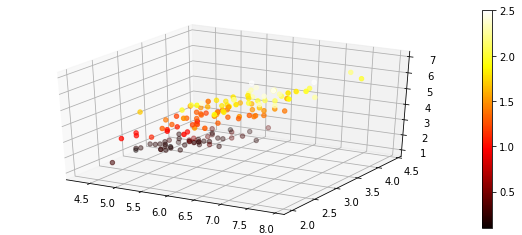

In [ ]:
fig = plt.figure(1,figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')


x=np.array(df['SepalLengthCm'])
y=np.array(df['SepalWidthCm'])
z = np.array(df['PetalLengthCm'])
c = np.array(df['PetalWidthCm'])

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

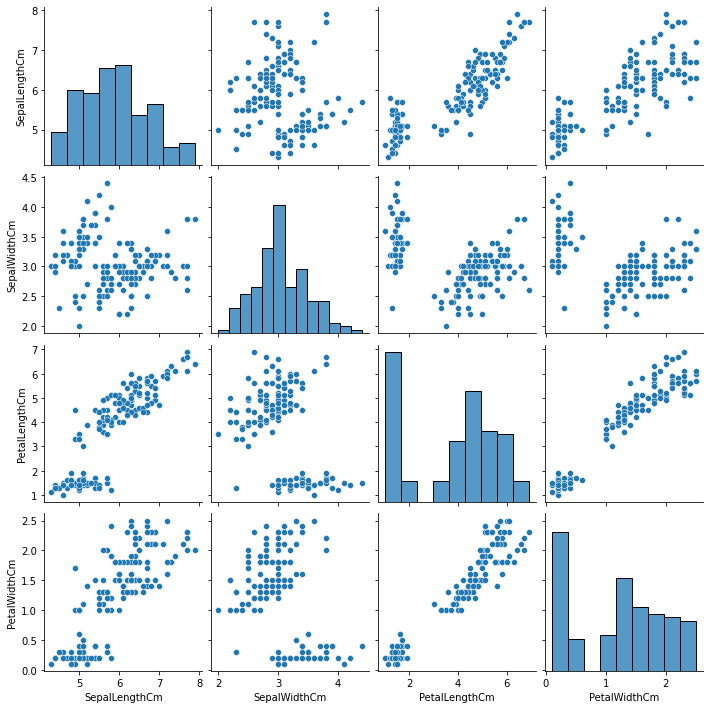

In [ ]:
#pairwise relationship for the given dataset
import seaborn as sns
sns.pairplot(df)

# Assigning Input and output Data

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(df['Species'])

# Decision Tree Algorithm

In [ ]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# visualize the Decision Tree

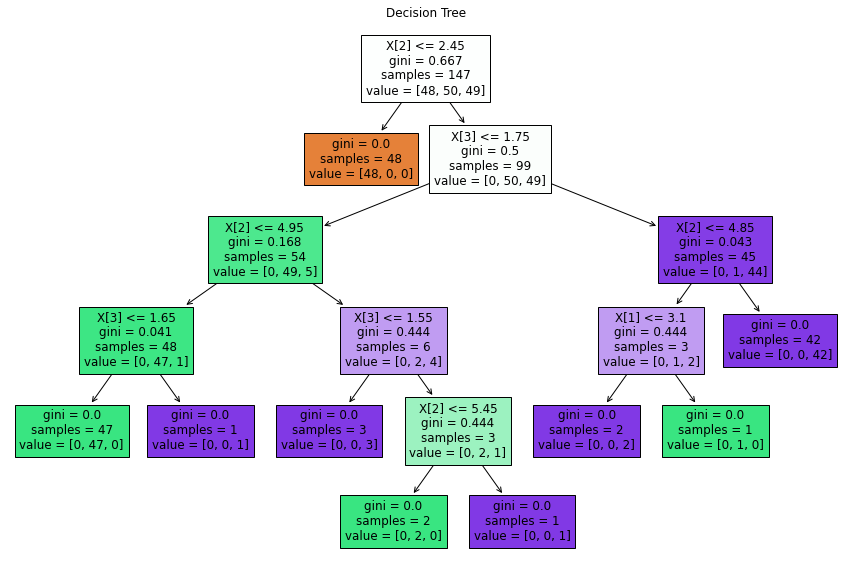

In [ ]:
# this or above
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(dtree, filled=True)
plt.title("Decision Tree")
plt.show()

# Outlier Detection and Removal

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.03)
yhat = lof.fit_predict(x)
print(yhat)
data=pd.DataFrame({'Anomaly':yhat})
data.head(20)
f2=pd.concat([df, data], axis=1)
print(f2)
index_names = f2[ f2['Anomaly'] == -1 ].index
print(index_names)
df.drop(index_names, inplace = True)
print(df)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1]
     SepalLengthCm  SepalWidthCm  ...         Species  Anomaly
0              5.1           3.5  ...     Iris-setosa      1.0
1              4.9           3.0  ...     Iris-setosa      1.0
2              4.7           3.2  ...     Iris-setosa      1.0
3              4.6           3.1  ...     Iris-setosa      1.0
4              5.0           3.6  ...     Iris-setosa      1.0
..             ...           ...  ...             ...      ...
145            6.7           3.0  ...  Iris-virginica      1.0
146            6.3           2.5  ...  Iris-vir

# Decision Tree Algorithm


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
dtree=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
model=dtree.fit(x_train, y_train)

# Accuracy

In [ ]:
prediction=dtree.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction, normalize=True)
print(acc)

0.9555555555555556


# Confusion Metrics

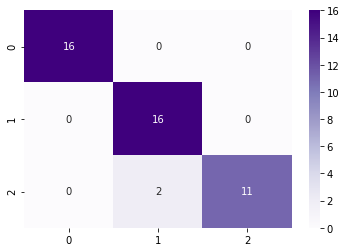

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,prediction)
sns.heatmap(con,annot=True,cmap='Purples')